In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load your dataset
file_path = "../data/output/ss/enhanced_data_20250411_111154.csv"
all_sites_df = pd.read_csv(file_path, encoding="latin1", low_memory=False)
 

In [12]:
# Filter for rows where account == 5504
filtered_data = all_sites_df[all_sites_df['account'] == 5504]

# Create a pivot table grouped by siteid and sum the invoice_line_total
pivot_table_siteid = filtered_data.pivot_table(
    index='siteid',
    values='invoice_line_total',
    aggfunc='sum'
).reset_index()

# Rename columns for clarity
pivot_table_siteid.columns = ['siteid', 'Historical_freight_cost']

# Merge the pivot table with site_names to add the 'site' column
pivot_table_with_site_names = pd.merge(
    pivot_table_siteid,
    site_names,
    on='siteid',
    how='left'
)

# Display the updated pivot table
pivot_table_with_site_names.sort_values(by='Historical_freight_cost', ascending=False).head(10)

,siteid,Historical_freight_cost,site
10,DIT,1556880.87,Diverzify Itasca
45,SPN,1412367.57,Spectra Norcross
52,SPW,1292396.28,Spectra Longwood
35,SPCP,1186951.35,Spectra Coppell
49,SPT,966940.02,Spectra Tampa
20,KUS,946961.79,Kiefer USA
37,SPHU,777219.17,Spectra Houston
27,PVF,669879.48,Pavillion Floors
51,SPTM,510460.98,Spectra Tempe
4,CTS,462184.81,Div National Accts


In [13]:
pivot_table_with_site_names.to_csv("../data/output/ss/filtered_data_5504.csv", index=False)

In [ ]:
unique_po_count_all_sites = all_sites_df['PO NO'].nunique()
print(f"Number of unique POs in all_sites_df: {unique_po_count_all_sites}")

Number of unique POs in all_sites_df: 140303


In [ ]:
# Load your dataset
file_path = "../data/output/Freight_Analysis_Enriched_Sample_Sites_Any_v4.csv"
sample_sites_df = pd.read_csv(file_path, encoding="latin1", low_memory=False)

In [186]:
all_sites_df.columns

Index(['SITE', 'SITE DESCRIPTION', 'SUPPLIER NO', 'SUPPLIER NAME', 'PO NO',
       'ACCOUNT', 'ACCOUNT DESCRIPTION', 'SHIP TO ZIP', 'PART NO',
       'PART DESCRIPTION', 'PO PURCH QTY', 'PO INV QTY', 'INVOICED LINE QTY',
       'PURCH UOM', 'INV UOM', 'INVOICE LINE TOTAL', 'PO PRICE',
       'TOTAL_PO_VALUE', 'PO_HAS_PROJECT_FREIGHT', 'PROJECT_FREIGHT_COST',
       'PROJECT_FREIGHT_PERCENT', 'PRODUCT_ONLY_PO_VALUE',
       'FREIGHT_â¥90%_OF_PO', 'FREIGHT_GT_PRODUCT',
       'NEGATIVE_FREIGHT_PERCENT', 'PO_HAS_MULTIPLE_PROJECT_FREIGHT_LINES',
       'COMM 1', 'Commodity Group', 'Description', 'Old/New', 'Priority',
       'IS_MANUAL', 'PRIORITY_PO_FLAG', 'QTY_CONSISTENCY_FLAG',
       'UOM_COMPARISON_STATUS', 'ALL_PRIORITY_2008', 'PRIORITY_PO_FLAG_2008'],
      dtype='object')

In [187]:
all_sites_df['PO NO'].nunique()


140303

In [188]:
# Filter for ACCOUNT == 5504
df_5504 = all_sites_df[all_sites_df['PO_HAS_PROJECT_FREIGHT'] == True]

# Group by PO NO and ensure all PRIORITY_PO_FLAG_2008 are True
all_priority_flag_true_po_5504 = df_5504.groupby('PO NO')['PRIORITY_PO_FLAG_2008'].all()

# Get the PO numbers that meet the condition (this is the "sample data")
sample_data_po_nos = all_priority_flag_true_po_5504[all_priority_flag_true_po_5504 == True].index

# Filter the original DataFrame for only these POs
sample_data_df = all_sites_df[all_sites_df['PO NO'].isin(sample_data_po_nos)]

# Group by SITE and calculate average PROJECT_FREIGHT_COST
top3_sites_avg_freight = (
    sample_data_df.groupby('SITE')['PROJECT_FREIGHT_COST']
    .mean()
    .sort_values(ascending=False)
    .head(3)
)

# Display results
print("Top 3 Sites by Average PROJECT_FREIGHT_COST:")
print(top3_sites_avg_freight)

Top 3 Sites by Average PROJECT_FREIGHT_COST:
SITE
DIT    2507.105164
DHQ    1849.170000
PSC    1376.462239
Name: PROJECT_FREIGHT_COST, dtype: float64


In [189]:
# Filter out rows where Account == 5504 and INVOICE LINE TOTAL is negative
sample_data_df = sample_data_df[
    ~((sample_data_df['ACCOUNT'] == 5504) & (sample_data_df['INVOICE LINE TOTAL'] < 0))
]

In [190]:

# Filter for ACCOUNT == 5504
df_5504 = all_sites_df[all_sites_df['ACCOUNT'] == 5504]

# Group by PO NO and check that all ALL_PRIORITY_2008 == True
all_priority_flag_true_po_5504 = df_5504.groupby('PO NO')['ALL_PRIORITY_2008'].all()

# Extract PO numbers where all ALL_PRIORITY_2008 flags are True — this is the sample data
sample_data_po_nos = all_priority_flag_true_po_5504[all_priority_flag_true_po_5504 == True].index

# Filter original DataFrame for sample data
sample_data_df = all_sites_df[all_sites_df['PO NO'].isin(sample_data_po_nos)]

# Group by supplier and calculate average PROJECT_FREIGHT_COST
top3_suppliers_by_freight = (
    sample_data_df.groupby('SUPPLIER NAME')['PROJECT_FREIGHT_COST']
    .mean()
    .sort_values(ascending=False)
    .head(3)
)

# Display result
print("Top 3 Suppliers by Average PROJECT_FREIGHT_COST:")
print(top3_suppliers_by_freight)

Top 3 Suppliers by Average PROJECT_FREIGHT_COST:
SUPPLIER NAME
Crossley Axminster Inc     68524.690909
InterfaceServices, Inc.    44150.311250
Trinity Tile               17592.273333
Name: PROJECT_FREIGHT_COST, dtype: float64


In [191]:
summary = sample_data_df.pivot_table(index=['SUPPLIER NAME'],values='PROJECT_FREIGHT_COST',aggfunc='mean').reset_index().sort_values(by='PROJECT_FREIGHT_COST', ascending=False).head(10)
print("Top 10 Sites by Average PROJECT_FREIGHT_COST:")
summary

Top 10 Sites by Average PROJECT_FREIGHT_COST:


,SUPPLIER NAME,PROJECT_FREIGHT_COST
52,Crossley Axminster Inc,68524.690909
107,"InterfaceServices, Inc.",44150.311250
223,Trinity Tile,17592.273333
222,Trinity Surfaces,14580.150435
161,"Oriental Weavers USA, Inc. dba OW Hospitality",8497.030000
51,"Couristan, Inc.",5671.790000
3,"AHF, LLC dba AHF Products",5302.840000
98,Global Floor Inc,4003.000000
76,"Ege Americas, Inc.",3336.842105
231,WestSide Transformation Corp.,2833.000000


In [192]:
# Filter out rows where Account == 5504 and INVOICE LINE TOTAL is negative
sample_data_df = sample_data_df[
    ~((sample_data_df['ACCOUNT'] == 5504) & (sample_data_df['INVOICE LINE TOTAL'] < 0))
]

In [193]:
# Filter for ACCOUNT == 5504
filtered_sample_data = sample_data_df[sample_data_df['ACCOUNT'] == 5504]

# Group by SITE and sum the INVOICE LINE TOTAL
site_invoice_totals = filtered_sample_data.groupby('SITE DESCRIPTION')['INVOICE LINE TOTAL'].sum().sort_values(ascending=False).reset_index()

# Display the results
site_invoice_totals

,SITE DESCRIPTION,INVOICE LINE TOTAL
0,Spectra Longwood,380899.35
1,Spectra Tampa,274316.70
2,Diverzify Itasca,259671.39
3,Spectra Houston,251094.75
4,Spectra Coppell,246133.89
5,Floor Sol Union,209125.37
6,Spectra Norcross,182191.76
7,Spectra Tempe,181789.67
8,Spectra W Valley Cty,167208.05
9,Spectra Jacksonville,118007.79


In [194]:
unique_po_count = sample_data_df.groupby('SITE DESCRIPTION')['PO NO'].nunique().sort_values(ascending=False).reset_index()
unique_po_count.head()

,SITE DESCRIPTION,PO NO
0,Floor Sol Union,1324
1,Spectra Longwood,1059
2,Spectra Tampa,888
3,Spectra Houston,795
4,Spectra Norcross,746


In [195]:
# Merge site_invoice_totals and unique_po_count on 'SITE DESCRIPTION'
merged_data = pd.merge(site_invoice_totals, unique_po_count, on='SITE DESCRIPTION')

# Display the merged data
merged_data.head()


,SITE DESCRIPTION,INVOICE LINE TOTAL,PO NO
0,Spectra Longwood,380899.35,1059
1,Spectra Tampa,274316.70,888
2,Diverzify Itasca,259671.39,486
3,Spectra Houston,251094.75,795
4,Spectra Coppell,246133.89,414


In [198]:
# Group by SITE DESCRIPTION and calculate the average PROJECT_FREIGHT_PERCENT
average_freight_percent_by_site = sample_data_df.groupby('SITE DESCRIPTION')['PROJECT_FREIGHT_PERCENT'].mean()

# Display the result
average_freight_percent_by_site

TypeError: agg function failed [how->mean,dtype->object]

In [200]:
# Convert the Series to a DataFrame for merging
average_freight_percent_df = average_freight_percent_by_site.reset_index()

# Merge the data
merged_with_freight_percent = pd.merge(merged_data, average_freight_percent_df, on='SITE DESCRIPTION', how='left')

# Rename the column for clarity
merged_with_freight_percent.rename(columns={'PROJECT_FREIGHT_PERCENT': 'AVERAGE_FREIGHT_PERCENT'}, inplace=True)

# Display the merged data
merged_with_freight_percent.head(10)


,SITE DESCRIPTION,INVOICE LINE TOTAL,PO NO,AVERAGE_FREIGHT_PERCENT
0,Spectra Longwood,380899.35,1059,NaN
1,Spectra Tampa,274316.70,888,0.106301
2,Diverzify Itasca,259671.39,486,0.092956
3,Spectra Houston,251094.75,795,0.110139
4,Spectra Coppell,246133.89,414,inf
5,Floor Sol Union,209125.37,1324,0.084330
6,Spectra Norcross,182191.76,746,0.085139
7,Spectra Tempe,181789.67,417,inf
8,Spectra W Valley Cty,167208.05,547,0.108027
9,Spectra Jacksonville,118007.79,353,-inf


In [201]:
merged_with_freight_percent = merged_with_freight_percent.dropna(subset=['AVERAGE_FREIGHT_PERCENT'])
merged_with_freight_percent.head(10)


,SITE DESCRIPTION,INVOICE LINE TOTAL,PO NO,AVERAGE_FREIGHT_PERCENT
1,Spectra Tampa,274316.70,888,0.106301
2,Diverzify Itasca,259671.39,486,0.092956
3,Spectra Houston,251094.75,795,0.110139
4,Spectra Coppell,246133.89,414,inf
5,Floor Sol Union,209125.37,1324,0.084330
6,Spectra Norcross,182191.76,746,0.085139
7,Spectra Tempe,181789.67,417,inf
8,Spectra W Valley Cty,167208.05,547,0.108027
9,Spectra Jacksonville,118007.79,353,-inf
10,Contract Carpet Sol,111628.78,429,0.102098


In [202]:
# Export enriched dataset
output_path = "../data/output/site-freight.csv"
merged_with_freight_percent.to_csv(output_path, index=False)
print(f"\n✅ Enriched dataset exported to: {output_path}")


✅ Enriched dataset exported to: ../data/output/site-freight.csv


In [203]:
# Filter for Account == 5504
filtered_data = sample_data_df[sample_data_df['ACCOUNT'] == 5504]

# Group by ZIP code and sum the INVOICE LINE TOTAL
zip_code_totals = (
    filtered_data.groupby('SHIP TO ZIP')['INVOICE LINE TOTAL']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

# Display the top 5 ZIP codes by INVOICE LINE TOTAL
print("Top 5 ZIP codes by INVOICE LINE TOTAL:")
zip_code_totals.reset_index()

Top 5 ZIP codes by INVOICE LINE TOTAL:


,SHIP TO ZIP,INVOICE LINE TOTAL
0,30071.0,14754.98
1,45215.0,12141.90
2,77040.0,12112.98
3,32750.0,11490.84
4,84120.0,11230.66


In [204]:
# Group by SHIP TO ZIP and count unique PO NO in the sample data
zip_code_unique_po = sample_data_df.groupby('SHIP TO ZIP')['PO NO'].nunique().reset_index()

# Rename columns for clarity
zip_code_unique_po.columns = ['SHIP TO ZIP', 'UNIQUE_PO_COUNT']

# Display the result
zip_code_unique_po.head()

,SHIP TO ZIP,UNIQUE_PO_COUNT
0,10532.0,57
1,11416.0,1
2,11418.0,1
3,11563.0,1
4,11746.0,2


In [205]:
# Filter for ACCOUNT == 5504
filtered_account_5504 = sample_data_df[sample_data_df['ACCOUNT'] == 5504]

# Group by SHIP TO ZIP and calculate the average INVOICE LINE TOTAL
average_invoice_by_zip = (
    filtered_account_5504.groupby('SHIP TO ZIP')['INVOICE LINE TOTAL']
    .sum()
    .reset_index()
    .sort_values(by='INVOICE LINE TOTAL', ascending=False)
)

# Display the result
average_invoice_by_zip.head()

,SHIP TO ZIP,INVOICE LINE TOTAL
5,30071.0,14754.98
17,45215.0,12141.90
24,77040.0,12112.98
9,32750.0,11490.84
28,84120.0,11230.66


In [206]:
# Filter for ACCOUNT == 5504
filtered_data_5504 = sample_data_df[sample_data_df['ACCOUNT'] == 5504]

# Group by SHIP TO ZIP and calculate the average PROJECT_FREIGHT_PERCENT
average_freight_percent_by_zip = (
    filtered_data_5504.groupby('SHIP TO ZIP')['PROJECT_FREIGHT_PERCENT']
    .mean()
    .reset_index()
    .sort_values(by='PROJECT_FREIGHT_PERCENT', ascending=False)
)

# Display the result
average_freight_percent_by_zip.head()

TypeError: agg function failed [how->mean,dtype->object]

In [207]:
# Merge average_invoice_by_zip and average_freight_percent_by_zip on 'SHIP TO ZIP'
merged_zip_data = pd.merge(average_invoice_by_zip, average_freight_percent_by_zip, on='SHIP TO ZIP', how='inner')

# Display the merged data
merged_zip_data.head()

,SHIP TO ZIP,INVOICE LINE TOTAL,PROJECT_FREIGHT_PERCENT
0,30071.0,14754.98,0.076113
1,45215.0,12141.90,inf
2,77040.0,12112.98,0.078117
3,32750.0,11490.84,inf
4,84120.0,11230.66,0.103291


In [208]:
# Merge zip_code_unique_po with merged_zip_data on 'SHIP TO ZIP'
merged_zip_data_with_po_count = pd.merge(merged_zip_data, zip_code_unique_po, on='SHIP TO ZIP', how='left')

# Display the merged data
merged_zip_data_with_po_count.head()

,SHIP TO ZIP,INVOICE LINE TOTAL,PROJECT_FREIGHT_PERCENT,UNIQUE_PO_COUNT
0,30071.0,14754.98,0.076113,750
1,45215.0,12141.90,inf,273
2,77040.0,12112.98,0.078117,797
3,32750.0,11490.84,inf,1058
4,84120.0,11230.66,0.103291,548


In [209]:
# Export enriched dataset
output_path = "../data/output/ZIP-freight.csv"
merged_zip_data_with_po_count.to_csv(output_path, index=False)
print(f"\n✅ Enriched dataset exported to: {output_path}")

PermissionError: [Errno 13] Permission denied: '../data/output/ZIP-freight.csv'

In [210]:
# Group by SUPPLIER NAME and sum the PROJECT_FREIGHT_COST
top_10_freight_spend_suppliers = (
    sample_data_df.groupby('SUPPLIER NAME')['PROJECT_FREIGHT_COST']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Display the result
print("Top 10 Freight Spend for Suppliers:")
print(top_10_freight_spend_suppliers)

Top 10 Freight Spend for Suppliers:
SUPPLIER NAME
Shaw Industries, Inc.       6798390.38
Crossley Axminster Inc      3015086.40
Interface Americas, Inc.    1837202.91
Mohawk Industries           1162836.96
Mannington Mills, Inc.       825377.49
InterfaceServices, Inc.      706404.98
Tarkett USA Inc              616420.67
Milliken & Company           444646.86
J.J. Haines & Company        408965.72
Bentley Mills, Inc.          349660.10
Name: PROJECT_FREIGHT_COST, dtype: float64


In [211]:
# Filter for ACCOUNT == 5504 in the sample data
account_5504_data = sample_data_df[sample_data_df['ACCOUNT'] == 5504]

# Group by SUPPLIER NAME and sum the INVOICE LINE TOTAL
top_10_suppliers_invoice_total = (
    account_5504_data.groupby('SUPPLIER NAME')['INVOICE LINE TOTAL']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .reset_index()
)

# Display the resulting DataFrame
top_10_suppliers_invoice_total

,SUPPLIER NAME,INVOICE LINE TOTAL
0,"Shaw Industries, Inc.",1373059.17
1,"Interface Americas, Inc.",376470.59
2,Mohawk Industries,264099.20
3,"Mannington Mills, Inc.",213462.24
4,Tarkett USA Inc,136945.71
5,"Bentley Mills, Inc.",104553.80
6,Spartan Surfaces,101423.89
7,Milliken & Company,94700.28
8,Engineered Floors LLC,82005.24
9,Crossley Axminster Inc,74644.40


In [ ]:
# Calculate the total invoice line total
total_invoice_line_total = top_10_suppliers_invoice_total['INVOICE LINE TOTAL'].sum()

# Add a new column for the percentage
top_10_suppliers_invoice_total['PERCENTAGE'] = (
    top_10_suppliers_invoice_total['INVOICE LINE TOTAL'] / total_invoice_line_total * 100
)

# Display the updated DataFrame
top_10_suppliers_invoice_total

,SUPPLIER NAME,INVOICE LINE TOTAL,PERCENTAGE
0,"Shaw Industries, Inc.",1373059.17,43.132562
1,"Interface Americas, Inc.",376470.59,11.826250
2,Mohawk Industries,264099.20,8.296274
3,"Mannington Mills, Inc.",213462.24,6.705591
4,Tarkett USA Inc,136945.71,4.301941
5,"Bentley Mills, Inc.",104553.80,3.284398
6,Spartan Surfaces,101423.89,3.186077
7,Milliken & Company,94700.28,2.974865
8,Engineered Floors LLC,82005.24,2.576070
9,"Crossley Axminster, Inc.",73451.40,2.307364


In [ ]:
# Export enriched dataset
output_path = "../data/output/supplier-freight.csv"
top_10_suppliers_invoice_total.to_csv(output_path, index=False)
print(f"\n✅ Enriched dataset exported to: {output_path}")


✅ Enriched dataset exported to: ../data/output/supplier-freight.csv


In [ ]:
description_counts = all_sites_df.groupby('Description').size().sort_values(ascending=False).reset_index(name='Count')

# Display the result
description_counts

,Description,Count
0,Ceramic/Natural Stone,18958
1,Base,17502
2,Vinyl,16621
3,Transitions,15855
4,Sundry,15315
...,...,...
83,Zero Cost,2
84,Vinyl/Rubber,1
85,Thinset,1
86,Riser,1


In [ ]:
# Filter for ACCOUNT == 5504
filtered_data_5504 = sample_data_df[sample_data_df['ACCOUNT'] == 2008]

# Group by Description and calculate the sum of INVOICE LINE TOTAL
grouped_invoice_totals = filtered_data_5504.groupby('Description')['INVOICE LINE TOTAL'].sum()

# Calculate the difference between the highest and lowest values
difference = grouped_invoice_totals.max() - grouped_invoice_totals.min()

print(f"The difference between the highest and lowest INVOICE LINE TOTAL is: {difference}")

The difference between the highest and lowest INVOICE LINE TOTAL is: 26645692.75


In [ ]:
# Group by Commodity Group and SUPPLIER NAME, then sum the PROJECT_FREIGHT_COST
commodity_supplier_cost = sample_data_df.groupby(['Description', 'SUPPLIER NAME'])['PROJECT_FREIGHT_COST'].sum().sort_values(ascending=False)

# Sort within each commodity and get the top 3 suppliers
top3_suppliers_per_commodity = (
    commodity_supplier_cost.groupby(level=0, group_keys=False)
    .apply(lambda x: x.sort_values(ascending=False).head(3))
    .reset_index()
)

# Rename columns for clarity
top3_suppliers_per_commodity.columns = ['Description', 'Supplier Name', 'Total Freight Cost']

# Display the result
print("Top 3 Suppliers per Commodity:")
print(top3_suppliers_per_commodity)

Top 3 Suppliers per Commodity:
     Description             Supplier Name  Total Freight Cost
0    Accessories    Mannington Mills, Inc.              125.00
1       Adhesive       Bentley Mills, Inc.             1486.15
2      Adhesives     Shaw Industries, Inc.              110.68
3         Carpet     Shaw Industries, Inc.           109545.11
4         Carpet         Mohawk Industries            41726.26
5         Carpet           Couristan, Inc.            34030.74
6      Carpet BL     Shaw Industries, Inc.           701916.00
7      Carpet BL         Mohawk Industries            88286.48
8      Carpet BL           Tarkett USA Inc            57337.90
9    Carpet Tile  Crossley Axminster, Inc.          2350444.80
10   Carpet Tile     Shaw Industries, Inc.          1631054.51
11   Carpet Tile  Interface Americas, Inc.           577729.67
12  Carpet Tiles     Shaw Industries, Inc.           121782.27
13  Carpet Tiles        Ege Americas, Inc.            37780.00
14  Carpet Tiles  Interf

In [ ]:
# Export enriched dataset
output_path = "../data/output/Commodity-sample.csv"
description_counts.to_csv(output_path, index=False)
print(f"\n✅ Enriched dataset exported to: {output_path}")


✅ Enriched dataset exported to: ../data/output/Commodity-sample.csv


In [ ]:
site_description_freight_cost = all_sites_df.groupby('SITE DESCRIPTION')['PROJECT_FREIGHT_COST'].sum()
print(site_description_freight_cost)

SITE DESCRIPTION
Beckers New Brighton      452520.44
Beckers Saint Cloud        97345.69
Continental Floors       2756447.91
Contract Carpet Gov       507642.94
Contract Carpet Sol      1661334.95
Div National Accts       2844930.79
Diverzify Cincinnati     1418254.89
Diverzify Columbus          3993.95
Diverzify HQ                5547.51
Diverzify Indy            406963.75
Diverzify Itasca        13467468.55
Diverzify Nashville         1600.85
Diverzify St. Louis       476061.86
Diverzify Tampa                0.00
Epoxy SI                  130309.64
Floor Maint Group              0.00
Floor Sol Charleston      164721.60
Floor Sol Greensboro      456682.86
Floor Sol New Hanovr      375665.47
Floor Sol Union          1799281.56
Kenny Floor Covering     1177534.15
Kiefer USA               4551785.96
Pavillion Floors         5013004.04
ProSpectra Ceritos       3044453.18
ProSpectra Las Vegas      266952.83
ProSpectra Poway          536095.80
ProSpectra Sacrament       12671.46
ProSpectra 

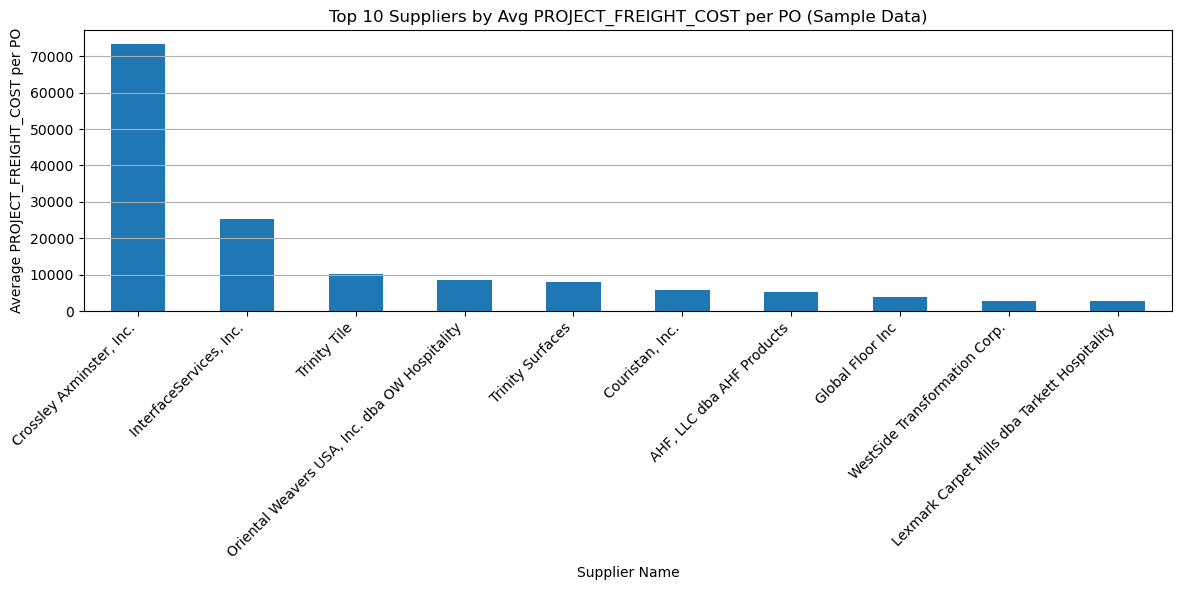

In [ ]:



# Compute average freight per PO for each supplier
supplier_po_freight_avg = (
    sample_data_df.groupby(['SUPPLIER NAME', 'PO NO'])['PROJECT_FREIGHT_COST']
    .mean()
    .groupby('SUPPLIER NAME')
    .mean()
    .sort_values(ascending=False)
)

# Plot top 10
top_suppliers_avg_freight_project_cost = supplier_po_freight_avg.head(10)
plt.figure(figsize=(12, 6))
top_suppliers_avg_freight_project_cost.plot(kind='bar')
plt.title('Top 10 Suppliers by Avg PROJECT_FREIGHT_COST per PO (Sample Data)')
plt.xlabel('Supplier Name')
plt.ylabel('Average PROJECT_FREIGHT_COST per PO')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [ ]:
# Filter for ACCOUNT == 5504
filtered_sample_data = sample_data_df[sample_data_df['ACCOUNT'] == 5504]

# Group by SITE DESCRIPTION and calculate total INVOICE LINE TOTAL and count of unique PO NO
site_summary = (
    filtered_sample_data.groupby('SITE DESCRIPTION')
    .agg(
        TOTAL_INVOICE_LINE_TOTAL=('INVOICE LINE TOTAL', 'sum'),
        UNIQUE_PO_COUNT=('PO NO', 'nunique')
    )
    .reset_index()
)

# Display the resulting DataFrame
site_summary

,SITE DESCRIPTION,TOTAL_INVOICE_LINE_TOTAL,UNIQUE_PO_COUNT
0,Beckers New Brighton,24962.32,106
1,Beckers Saint Cloud,7665.30,15
2,Continental Floors,21469.46,61
3,Contract Carpet Gov,23443.66,85
4,Contract Carpet Sol,111628.78,429
5,Div National Accts,47578.53,85
6,Diverzify Cincinnati,55502.63,205
7,Diverzify HQ,1849.17,1
8,Diverzify Indy,3484.81,21
9,Diverzify Itasca,259671.39,485


In [ ]:
# Add a rank column based on TOTAL_INVOICE_LINE_TOTAL in descending order
site_summary['RANK'] = site_summary['TOTAL_INVOICE_LINE_TOTAL'].rank(ascending=False, method='dense').astype(int)

# Display the updated DataFrame
site_summary.sort_values(by='RANK', inplace=True)
site_summary.head()

,SITE DESCRIPTION,TOTAL_INVOICE_LINE_TOTAL,UNIQUE_PO_COUNT,RANK
32,Spectra Longwood,380899.35,1058,1
39,Spectra Tampa,274316.70,887,2
9,Diverzify Itasca,259671.39,485,3
28,Spectra Houston,251094.75,794,4
25,Spectra Coppell,246133.89,413,5


DATA VALIDATION 

In [292]:
# Load your dataset
file_path = "../data/output/Freight_Analysis_Enriched_all_sites_Any_v5.csv"
all_sites_df = pd.read_csv(file_path, encoding="latin1", low_memory=False)
all_sites_df.columns

Index(['SITE', 'SITE DESCRIPTION', 'SUPPLIER NO', 'SUPPLIER NAME',
       'PROJECT ID', 'PROJECT NAME', 'PO NO', 'ACCOUNT', 'ACCOUNT DESCRIPTION',
       'SHIP TO ZIP', 'PART NO', 'PART DESCRIPTION', 'PO PURCH QTY',
       'PO INV QTY', 'INVOICED LINE QTY', 'PURCH UOM', 'INV UOM',
       'INVOICE LINE TOTAL', 'PO PRICE', 'TOTAL_PO_VALUE',
       'PO_HAS_PROJECT_FREIGHT', 'PROJECT_FREIGHT_COST',
       'PROJECT_FREIGHT_PERCENT', 'PRODUCT_ONLY_PO_VALUE',
       'FREIGHT_â¥90%_OF_PO', 'FREIGHT_GT_PRODUCT',
       'NEGATIVE_FREIGHT_PERCENT', 'PO_HAS_MULTIPLE_PROJECT_FREIGHT_LINES',
       'COMM 1', 'Commodity Group', 'Description', 'Old/New', 'Priority',
       'IS_MANUAL', 'PRIORITY_PO_FLAG', 'QTY_CONSISTENCY_FLAG',
       'UOM_COMPARISON_STATUS', 'ALL_PRIORITY_2008', 'PRIORITY_PO_FLAG_2008'],
      dtype='object')

In [293]:
# Total Records 
all_sites_df.shape[0]
print (f'There are {all_sites_df.shape[0]} total records')

There are 441707 total records


In [294]:
# Total records (Project/PO/Invoice)
unique_po_count_all_sites = all_sites_df['PO NO'].nunique()
print(f"Number of unique POs in all_sites_df: {unique_po_count_all_sites}")

Number of unique POs in all_sites_df: 140303


In [295]:
# Negative freight costs
filtered_negative_invoice = all_sites_df[(all_sites_df['ACCOUNT'] == 5504) & (all_sites_df['INVOICE LINE TOTAL'] < 0)]

# Display the filtered DataFrame
print (f'There are {filtered_negative_invoice.shape[0]} lines with negative freight costs')



There are 917 lines with negative freight costs


In [296]:
# PO with negative freight costs
unique_po_count_negative_invoice = filtered_negative_invoice['PO NO'].nunique()
print(f"Number of unique PO NO in filtered_negative_invoice: {unique_po_count_negative_invoice}")

Number of unique PO NO in filtered_negative_invoice: 685


In [297]:
# Remove filtered_negative_invoice POs from all_sites_df
all_sites_df = all_sites_df[~all_sites_df['PO NO'].isin(filtered_negative_invoice['PO NO'])]

# Calculate the number of unique POs left
remaining_unique_po_count = all_sites_df['PO NO'].nunique()
print(f"Number of unique POs left: {remaining_unique_po_count}")

Number of unique POs left: 139618


In [298]:
# # Count records with no PO NO
# no_po_no_count = all_sites_df['PO NO'].isna().sum()
# print(f"Number of records with no PO NO: {no_po_no_count}")

# # Remove records with no PO NO
# all_sites_df = all_sites_df.dropna(subset=['PO NO'])

# # Display the updated DataFrame shape
# print(f"Updated all_sites_df shape: {all_sites_df.shape}")

In [299]:
# unique_po_count_all_sites = all_sites_df['PO NO'].nunique()
# print(f"Number of unique PO numbers in all_sites_df: {unique_po_count_all_sites}")

In [300]:
# POS without products (2008
# Group by 'PO NO' and check if all occurrences of 'ACCOUNT' are not equal to 2008
po_no_without_account_2008 = all_sites_df.groupby('PO NO')['ACCOUNT'].apply(lambda x: (x != 2008).all())

# Filter for POs that meet the condition
unique_po_without_account_2008 = po_no_without_account_2008[po_no_without_account_2008].index

# Display the result
print(f"Number of unique POs without any occurrence of ACCOUNT == 2008: {len(unique_po_without_account_2008)}")
unique_po_without_account_2008

Number of unique POs without any occurrence of ACCOUNT == 2008: 1421


Index(['100118', '100122', '100133', '100188', '100204', '100377-1', '100448',
       '100454', '100471', '100504',
       ...
       'SPL064994', 'SPLV064958', 'SPN268957', 'SPSA104514', 'SPSA104519',
       'SPSA104558', 'SPT117192', 'SPW161471', 'SPW162514', 'STOCK'],
      dtype='object', name='PO NO', length=1421)

In [301]:
# POS without products (2008
# Remove rows where 'PO NO' is in unique_po_without_account_2008
all_sites_df = all_sites_df[~all_sites_df['PO NO'].isin(unique_po_without_account_2008)]

# Calculate the number of unique POs left
remaining_unique_po_count = all_sites_df['PO NO'].nunique()
print(f"Number of unique POs left: {remaining_unique_po_count}")

Number of unique POs left: 138197


In [302]:
# Filter out rows where 'PO NO' is in unique_po_without_account_2008
all_sites_df = all_sites_df[~all_sites_df['PO NO'].isin(unique_po_without_account_2008)]

# Display the updated DataFrame shape
print(f"Updated all_sites_df shape: {all_sites_df.shape}")

Updated all_sites_df shape: (399504, 39)


In [303]:
# POS without project freight
# Group by 'PO NO' and check if all occurrences of 'ACCOUNT' are not equal to 5504
po_no_without_account_5504 = all_sites_df.groupby('PO NO')['ACCOUNT'].apply(lambda x: (x != 5504).all())

# Filter for POs that meet the condition
unique_po_without_account_5504 = po_no_without_account_5504[po_no_without_account_5504].index

# Display the result
print(f"Number of unique POs without any occurrence of ACCOUNT == 5504: {len(unique_po_without_account_5504)}")
unique_po_without_account_5504

Number of unique POs without any occurrence of ACCOUNT == 5504: 93336


Index(['03042025-1', '042583-1', '071024-1', '072324-1', '091724-2', '1-5 T05',
       '1.11E+11', '1.34E+11', '100001', '100002',
       ...
       'TASK327196', 'TEMP ROOM L', 'TEXTRON-A', 'TI SHERMAN', 'TONY', 'TTLEX',
       'VCT NW HS', 'WPEPXKITRWWS', 'WT-1 REMAINI', 'WT-3 ALT ART'],
      dtype='object', name='PO NO', length=93336)

In [ ]:
# Filter the DataFrame for POs in unique_po_without_account_5504
po_without_account_5504 = all_sites_df[all_sites_df['PO NO'].isin(unique_po_without_account_5504)]

# Display the filtered DataFrame
po_without_account_5504['PO NO'].unique()

array(['47721', '43089', '43258', ..., '203795', '201007', '205017'],
      dtype=object)

In [322]:
# Filter for rows where ACCOUNT == 5205
po_with_account_5205 = po_without_account_5504[po_without_account_5504['ACCOUNT'] == 5205]

# Count the unique PO NO
unique_po_with_account_5205_count = po_with_account_5205['PO NO'].nunique()

print(f"Number of unique POs in po_without_account_5504 with ACCOUNT == 5205: {unique_po_with_account_5205_count}")

Number of unique POs in po_without_account_5504 with ACCOUNT == 5205: 8750


In [329]:
# Create a pivot table for Supplier Name and count unique PO NO
pivot_table_supplier = po_without_account_5504.pivot_table(
    index='SUPPLIER NAME',
    values='PO NO',
    aggfunc=pd.Series.nunique
).reset_index()

# Rename columns for clarity
pivot_table_supplier.columns = ['SUPPLIER NAME', 'UNIQUE_PO_COUNT']

# Display the pivot table
pivot_table_supplier.sort_values(by='UNIQUE_PO_COUNT', ascending=False).head(10)

,SUPPLIER NAME,UNIQUE_PO_COUNT
825,Fishman Flooring Solutions,4342
318,"Cain & Bultman, Inc.",2132
1746,Professional Flooring Supply,1887
1979,"Shaw Industries, Inc.",1676
233,Big D Floor Covering Supplies (57269),1565
98,All Surfaces,1254
2126,"Surface Materials, LLC",1017
864,"Florstar Sales, Inc",1009
932,Gina's Tile & Marble Design LLC,1008
1533,NRF DISTRIBUTORS INC,910


In [325]:
# Create a pivot table for unique count of PO NO grouped by SITE DESCRIPTION
pivot_table_po_count = po_without_account_5504.pivot_table(
    index='SITE DESCRIPTION',
    values='PO NO',
    aggfunc=pd.Series.nunique
).reset_index()

# Rename columns for clarity
pivot_table_po_count.columns = ['SITE DESCRIPTION', 'UNIQUE_PO_COUNT']

# Display the pivot table
pivot_table_po_count.sort_values(by='UNIQUE_PO_COUNT', ascending=False).head(10)

,SITE DESCRIPTION,UNIQUE_PO_COUNT
41,Spectra Norcross,10077
45,Spectra Tampa,8050
38,Spectra Longwood,7394
31,Spectra Coppell,5490
46,Spectra Tempe,5311
34,Spectra Houston,5080
17,Floor Sol Union,4592
36,Spectra Jacksonville,2803
32,Spectra Denver,2720
9,Diverzify Itasca,2551


In [326]:
# Create a pivot table for unique PO count grouped by ZIP
pivot_table_zip_po_count = po_without_account_5504.pivot_table(
    index='SHIP TO ZIP',
    values='PO NO',
    aggfunc=pd.Series.nunique
).reset_index()

# Rename columns for clarity
pivot_table_zip_po_count.columns = ['SHIP TO ZIP', 'UNIQUE_PO_COUNT']

# Display the pivot table
pivot_table_zip_po_count.sort_values(by='UNIQUE_PO_COUNT', ascending=False).head(10)

,SHIP TO ZIP,UNIQUE_PO_COUNT
67,30071.0,10078
106,33605.0,8014
86,32750.0,7358
495,85283.0,5112
350,75019.0,5083
395,77040.0,5082
58,28079.0,4589
266,60143.0,3264
81,32256.0,2776
157,45215.0,2489


In [327]:
# Create a pivot table for ACCOUNT DESCRIPTION and count unique PO NO
pivot_table_account_description = po_without_account_5504.pivot_table(
    index='ACCOUNT DESCRIPTION',
    values='PO NO',
    aggfunc=pd.Series.nunique
).reset_index()

# Rename columns for clarity
pivot_table_account_description.columns = ['ACCOUNT DESCRIPTION', 'UNIQUE_PO_COUNT']

# Display the pivot table
pivot_table_account_description.sort_values(by='UNIQUE_PO_COUNT', ascending=False).head(10)

,ACCOUNT DESCRIPTION,UNIQUE_PO_COUNT
38,Received Not Yet Invoiced,93336
21,PROJECT PO Variance M181 & M182,8750
53,Warehouse Trash,3941
42,Sales Tax Payable,2083
26,PROJECT Supplies and Materials,1995
7,Delivery Other,1740
28,PROJECT Use Tax for Jobs,1645
37,Purchase Discounts,1122
20,PROJECT Other Direct Costs,741
47,Warehouse Count Variances,720


pivot_table_supplier, pivot_table_po_count,pivot_table_zip_po_count,pivot_table_account_description

In [330]:
# Export pivot_table_supplier to CSV
pivot_table_supplier.to_csv("../data/output/pivot_table_supplier.csv", index=False)
print("✅ pivot_table_supplier exported to ../data/output/pivot_table_supplier.csv")

# Export pivot_table_po_count to CSV
pivot_table_po_count.to_csv("../data/output/pivot_table_po_count.csv", index=False)
print("✅ pivot_table_po_count exported to ../data/output/pivot_table_po_count.csv")

# Export pivot_table_zip_po_count to CSV
pivot_table_zip_po_count.to_csv("../data/output/pivot_table_zip_po_count.csv", index=False)
print("✅ pivot_table_zip_po_count exported to ../data/output/pivot_table_zip_po_count.csv")

# Export pivot_table_account_description to CSV
pivot_table_account_description.to_csv("../data/output/pivot_table_account_description.csv", index=False)
print("✅ pivot_table_account_description exported to ../data/output/pivot_table_account_description.csv")

✅ pivot_table_supplier exported to ../data/output/pivot_table_supplier.csv
✅ pivot_table_po_count exported to ../data/output/pivot_table_po_count.csv
✅ pivot_table_zip_po_count exported to ../data/output/pivot_table_zip_po_count.csv
✅ pivot_table_account_description exported to ../data/output/pivot_table_account_description.csv


In [ ]:
# Export enriched dataset
output_path = "../data/output/Freight_Analysis_Enriched_all_sites_Any_v5.csv"
df_filtered.to_csv(output_path, index=False)
print(f"\n✅ Enriched dataset exported to: {output_path}")

Index(['SITE', 'SITE DESCRIPTION', 'SUPPLIER NO', 'SUPPLIER NAME',
       'PROJECT ID', 'PROJECT NAME', 'PO NO', 'ACCOUNT', 'ACCOUNT DESCRIPTION',
       'SHIP TO ZIP', 'PART NO', 'PART DESCRIPTION', 'PO PURCH QTY',
       'PO INV QTY', 'INVOICED LINE QTY', 'PURCH UOM', 'INV UOM',
       'INVOICE LINE TOTAL', 'PO PRICE', 'TOTAL_PO_VALUE',
       'PO_HAS_PROJECT_FREIGHT', 'PROJECT_FREIGHT_COST',
       'PROJECT_FREIGHT_PERCENT', 'PRODUCT_ONLY_PO_VALUE',
       'FREIGHT_â¥90%_OF_PO', 'FREIGHT_GT_PRODUCT',
       'NEGATIVE_FREIGHT_PERCENT', 'PO_HAS_MULTIPLE_PROJECT_FREIGHT_LINES',
       'COMM 1', 'Commodity Group', 'Description', 'Old/New', 'Priority',
       'IS_MANUAL', 'PRIORITY_PO_FLAG', 'QTY_CONSISTENCY_FLAG',
       'UOM_COMPARISON_STATUS', 'ALL_PRIORITY_2008', 'PRIORITY_PO_FLAG_2008'],
      dtype='object')

In [315]:
unique_po_without_account_5504

Index(['03042025-1', '042583-1', '071024-1', '072324-1', '091724-2', '1-5 T05',
       '1.11E+11', '1.34E+11', '100001', '100002',
       ...
       'TASK327196', 'TEMP ROOM L', 'TEXTRON-A', 'TI SHERMAN', 'TONY', 'TTLEX',
       'VCT NW HS', 'WPEPXKITRWWS', 'WT-1 REMAINI', 'WT-3 ALT ART'],
      dtype='object', name='PO NO', length=93336)

In [304]:
# Filter the DataFrame for POs without account_5504
po_without_account_5504_df = all_sites_df[all_sites_df['PO NO'].isin(unique_po_without_account_5504)]

# Check if 'ACCOUNT DESCRIPTION' contains the word "delivery" (case-insensitive)
po_with_delivery = po_without_account_5504_df[po_without_account_5504_df['ACCOUNT DESCRIPTION'].str.contains('delivery', case=False, na=False)]

# Get the count of unique POs
unique_po_with_delivery_count = po_with_delivery['PO NO'].nunique()

print(f"Number of unique POs without account_5504 that have 'delivery' in ACCOUNT DESCRIPTION: {unique_po_with_delivery_count}")

Number of unique POs without account_5504 that have 'delivery' in ACCOUNT DESCRIPTION: 1744


In [305]:
# Filter for rows where 'PO NO' is in unique_po_without_account_5504 and 'Project ID' is null
po_without_account_5504_no_project_id = all_sites_df[
    all_sites_df['PO NO'].isin(unique_po_without_account_5504) & all_sites_df['PROJECT ID'].isna()
]

# Count the number of unique POs
count_no_project_id = po_without_account_5504_no_project_id['PO NO'].nunique()

print(f"Number of unique POs in unique_po_without_account_5504 without a Project ID: {count_no_project_id}")

Number of unique POs in unique_po_without_account_5504 without a Project ID: 4963


In [307]:
# Filter for rows where 'ACCOUNT DESCRIPTION' contains the word "delivery" (case-insensitive)
delivery_count = po_without_account_5504_no_project_id[
    po_without_account_5504_no_project_id['ACCOUNT DESCRIPTION'].str.contains('delivery', case=False, na=False)
].shape[0]

print(f"Number of rows with 'ACCOUNT DESCRIPTION' containing 'delivery': {delivery_count}")

Number of rows with 'ACCOUNT DESCRIPTION' containing 'delivery': 1919


In [311]:
# Group by SUPPLIER NAME and count unique PO NO for delivery_count
supplier_po_distribution = po_without_account_5504_no_project_id[
    po_without_account_5504_no_project_id['ACCOUNT DESCRIPTION'].str.contains('delivery', case=False, na=False)
].groupby('SUPPLIER NAME')['PO NO'].nunique().reset_index()

# Rename columns for clarity
supplier_po_distribution.columns = ['SUPPLIER NAME', 'UNIQUE_PO_COUNT']

# Display the result
no_freight_supplier = supplier_po_distribution.sort_values(by='UNIQUE_PO_COUNT', ascending=False).head(10)

In [256]:
# Remove rows where 'PO NO' is in unique_po_without_account_5504
all_sites_df = all_sites_df[~all_sites_df['PO NO'].isin(unique_po_without_account_5504)]

# Calculate the number of unique PO numbers remaining
remaining_unique_po_count = all_sites_df['PO NO'].nunique()
print(f"Number of unique PO numbers remaining: {remaining_unique_po_count}")

Number of unique PO numbers remaining: 44861


In [ ]:
# Filter out rows where 'PO NO' is in unique_po_without_account_5504
all_sites_df = all_sites_df[~all_sites_df['PO NO'].isin(unique_po_without_account_5504)]

# Display the updated DataFrame shape
print(f"Updated all_sites_df shape: {all_sites_df.shape}")

Updated all_sites_df shape: (173388, 37)


In [257]:
# POS with at least one priority products
unique_priority_po_count = all_sites_df[all_sites_df['PRIORITY_PO_FLAG'] == True]['PO NO'].nunique()
print(f"Number of unique POs with PRIORITY_PO_FLAG == True: {unique_priority_po_count}")

Number of unique POs with PRIORITY_PO_FLAG == True: 17020


In [243]:
# Filter for PO's where PRIORITY_PO_FLAG is not True
non_priority_po = all_sites_df[all_sites_df['PRIORITY_PO_FLAG'] != True]['PO NO'].unique()

# Display the unique PO numbers
print("Unique PO's without PRIORITY_PO_FLAG == True:")
print(non_priority_po)

Unique PO's without PRIORITY_PO_FLAG == True:
['47721' '44735' '47320' ... '201007' '205017' '199846']


In [ ]:
# Filter out non-priority POs
all_sites_df = all_sites_df[all_sites_df['PRIORITY_PO_FLAG'] == True]

# Display the updated DataFrame shape
print(f"Updated all_sites_df shape: {all_sites_df.shape}")

Updated all_sites_df shape: (66438, 37)


In [ ]:
# Find unique POs where PRIORITY_PO_FLAG_2008 is False
unique_po_priority_false = all_sites_df[all_sites_df['ALL_PRIORITY_PO_FLAG_2008'] == False]['PO NO'].unique()

# Display the list of unique POs
print(f"Number of unique POs with PRIORITY_PO_FLAG_2008 == False: {len(unique_po_priority_false)}")
print("List of unique POs with PRIORITY_PO_FLAG_2008 == False:")
print(unique_po_priority_false)

# Remove these POs from all_sites_df
all_sites_df = all_sites_df[~all_sites_df['PO NO'].isin(unique_po_priority_false)]

# Display the updated DataFrame shape
print(f"Updated all_sites_df shape: {all_sites_df.shape}")

Number of unique POs with PRIORITY_PO_FLAG_2008 == False: 125836
List of unique POs with PRIORITY_PO_FLAG_2008 == False:
['48180' '47721' '43089' ... '201007' '205017' '199846']
Updated all_sites_df shape: (38004, 39)


In [259]:
unique_priority_po_count_2008 = all_sites_df[all_sites_df['PRIORITY_PO_FLAG_2008'] == True]['PO NO'].nunique()
print(f"Number of unique POs with PRIORITY_PO_FLAG_2008 == True: {unique_priority_po_count_2008}")

Number of unique POs with PRIORITY_PO_FLAG_2008 == True: 11250


In [ ]:
all_sites_df

Number of rows with PO NO == NaN: 35218
